In [32]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.feature_names
iris.target
iris.target_names
#iris.target.shape

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [42]:
iris.data.shape
iris.target.shape
X = iris.data
y = iris.target


In [20]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


In [35]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [39]:
# use list of lists, two dimensional array
x_new = [[3,5,4,2],[5,4,3,2]]
knn.predict(x_new)
# list of lists because I need a 2D array

array([1, 1])

In [41]:
# use logistic regression model
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X,y)

# predict response for new observations
logreg.predict(x_new)

# next steps - evaluate which k value to use, and whether KNN or
# logistic regression is better choice here

array([2, 0])

In [46]:
# test model on dataset where we do know true response values. 
# check how well model is doing. 

y_pred = logreg.predict(X)
len(y_pred)

# need numerical way to see how model performed. proportion of correct predictions
# metrics module - use accuracy score function, pass it true response values, followed
# by predicted response values
from sklearn import metrics
print(metrics.accuracy_score(y,y_pred))

# training accuracy - testing the model on the same data we used to train the model. **



0.96


In [49]:
# let's do it again for KNN where K =5 an k=1. Will be training and testing on the 
# same data again

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y,y_pred))

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y,y_pred))

# unnecessarily complex = overfitting. learn noise vs signal


0.966666666667
1.0


In [54]:
print(x.shape) # feature matrix
print(y.shape) # response vector - 150 response values

# split using scikit-learn's built in train test split function
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)

# feature matrix X train that is 3x2, response vector that is size 3.
# train and test on different sets of data - resulting accuracy is better 
# estimate of how well model will perform on future data
# people use 20-40% of data for testing

# if you use random_state in the function above, it will split data the same every time


(150, 4)
(150,)


In [61]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# split evidence. 
# step 2 - train the model on the training set 

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

(90, 4)
(60, 4)
(90,)
(60,)
0.966666666667


In [68]:
# Let's implement KNN with K=5 and K=1 using the train and test data

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))


0.933333333333
0.933333333333


array([1])

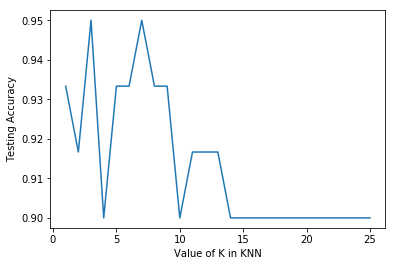

In [76]:
# Loop through Ks to see which K is more accurate
k_range = range(1,26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))

# then plot the Ks and their accuraxcy
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel("Value of K in KNN")
plt.ylabel("Testing Accuracy")

# rise and fall of testing accuracy - training accuracy rises as model complexity increases
# testing accuracy penalizes excess complexity and excess simplicity. Need right level of complexity.
# once you choose model and optimal parameters, re-train model on all availability training data

knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X,y)
knn.predict([[3,5,4,2]])

# train test split provides high variance estimate of out of sample accuracy
# can change a lot depending on data in training set
# k-fold cross-validation - overcomes this limitation by repeating train test split process multiple times in systematic way and average results



# Next step - pandas + seaborn with scikit-learn
Use pandas library to read data into python, seaborn library to visualize data, linear regression, train + interpret, evaluation metrics, which features to include
-Regression goal is to predict continuous response as opposed to classification

In [82]:
import pandas as pd
# CSV files are common way to store data, each observation is single line in file
# Fields separated by commas. Read files directly from RAW URL
data = pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv')
data.head()





,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
